In [3]:
metric_noise_2_mnist={}
metric_fashion_2_mnist={}
metric_emnist_2_mnist={}

bins = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0]

metric_noise_2_mnist[0.001] = [251.09266662597656, 427.0834655761719, 549.8983764648438, 0.01761789433658123]
metric_noise_2_mnist[0.01] = [193.7793731689453, 354.24713134765625, 459.2188720703125, 0.008844062685966492]
metric_noise_2_mnist[0.1] = [83.64622497558594, 207.3448944091797, 279.20025634765625, 0.002710517961531877]
metric_noise_2_mnist[0.25] = [35.75359344482422, 92.8792495727539, 116.37661743164062, 0.0004629716568160802]
metric_noise_2_mnist[0.5] = [18.732826232910156, 42.96107864379883, 45.05111312866211, 0.0004182535340078175]
metric_noise_2_mnist[0.75] = [25.322158813476562, 65.18745422363281, 76.36065673828125,  0.00053217675304040]
metric_noise_2_mnist[1.0] = [22.476999282836914, 55.30744171142578, 59.81681442260742, 0.00036605674540624]
metric_noise_2_mnist[1.5] = [36.93931579589844, 99.6308822631836, 118.851623535156, 0.000347004475]
metric_noise_2_mnist[2.0] = [246.09559631347656, 596.8870849609375, 809.1619873046875, 0.016226010397076607]

metric_fashion_2_mnist[0.001] = [352.08843994140625,768.8702392578125, 1136.1123046875, 0.01671394705]
metric_fashion_2_mnist[0.01] = [ 715.198974609375, 1526.116455078125, 2382.44482421875,  0.0888187959790229]
metric_fashion_2_mnist[0.1] = [ 132.25433349609375, 224.1044464111328, 269.0678405761719, 0.004659062251448631]
metric_fashion_2_mnist[0.25] = [105.69064331054688, 211.35848999023438, 270.9761962890625,  0.004393494687974453]
metric_fashion_2_mnist[0.5] = [134.939453125, 314.98284912109375, 422.8227233886719, 0.00708423228934407]
metric_fashion_2_mnist[0.75] = [ 132.92941284179688, 287.20416259765625,377.1435546875, 0.00643137143924832]
metric_fashion_2_mnist[1.0] = [261.3972473144531, 588.8427124023438, 812.3112182617188, 0.015046264044]
metric_fashion_2_mnist[1.5] = [360.04278564453125, 852.75390625, 1191.568847656,  0.020207460969686]
metric_fashion_2_mnist[2.0] = [509.92401123046875, 1127.20166015625, 1627.2083740234375, 0.0295654758810997]

metric_emnist_2_mnist[0.001] = [252.32456970214844, 625.3779296875, 884.63623046875,  0.0174526367336511]
metric_emnist_2_mnist[0.01] = [249.29476928710938, 530.6546630859375, 760.9715576171875, 0.0107129253447055]
metric_emnist_2_mnist[0.1] = [224.41806030273438, 565.8157348632812, 795.5594482421875, 0.0079795252531766]
metric_emnist_2_mnist[0.25] = [226.43226623535156, 561.8699951171875, 793.54467773437, 0.00975626334]
metric_emnist_2_mnist[0.5] = [156.4591064453125, 408.36297607421875, 576.047241210937,  0.00496700545772]
metric_emnist_2_mnist[0.75] = [191.02491760253906, 494.7055969238281, 707.5882568359375, 0.00556790828704834]
metric_emnist_2_mnist[1.0] = [357.6357116699219, 826.9640502929688, 1183.964233398437, 0.01941529475152492]
metric_emnist_2_mnist[1.5] = [526.0735473632812, 1166.00146484375, 1706.36328125, 0.031717661768198]
metric_emnist_2_mnist[2.0] = [664.01123046875, 1381.452880859375, 2064.0507812, 0.03870360553264618]

metric_noise_2_mnist_OT={}
metric_fashion_2_mnist_OT={}
metric_emnist_2_mnist_OT={}
bins_OT = [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

metric_noise_2_mnist_OT[0.001] = [271.52886962890625, 477.6775817871094, 601.8549194335938, 0.0208451040089130]
metric_noise_2_mnist_OT[0.01] =  [529.3208618164062, 1275.3487548828125, 1740.39099121093, 0.034670785069465]
metric_noise_2_mnist_OT[0.1] =  [164.87457275390625, 408.96112060546875, 521.65905761718, 0.01203566696494817]
metric_noise_2_mnist_OT[0.25] =  [90.85563659667969, 220.6476287841797, 280.966278076171,  0.0057113035582005]
metric_noise_2_mnist_OT[0.5] =  [69.50044250488281, 170.12289428710938, 211.71069335937, 0.00296603422611951]
metric_noise_2_mnist_OT[0.75] =  [63.0762939453125,  171.65435791015625, 221.389389038085, 0.0017888979054987]
metric_noise_2_mnist_OT[1.0] =  [55.771324157714844, 144.7249755859375, 175.6138000488281, 0.00149758870247751]
metric_noise_2_mnist_OT[1.5] =  [49.828189849853516, 134.28106689453125, 166.1834716796, 0.00065581547096371]
metric_noise_2_mnist_OT[2.0] =  [58.54990005493164, 169.2209930419922, 213.8253784179687, 0.0005176741397008]
metric_noise_2_mnist_OT[2.5] = [57.385093688964844, 154.1526641845703, 193.7227478027343, 0.0009065068443305]
metric_noise_2_mnist_OT[3.0] = [74.37781524658203, 215.29100036621094, 287.925781,  0.00060744292568]
metric_noise_2_mnist_OT[3.5] = [80.06775665283203, 227.53814697265625, 301.19000244140625, 0.000783964991569519]
metric_noise_2_mnist_OT[4.0] = [83.40327453613281, 235.9127197265625, 316.130859375, 0.0009585017105564]
metric_noise_2_mnist_OT[4.5] = [95.16847229003906, 262.34063720703125, 350.756225585937,  0.0013265883]
metric_noise_2_mnist_OT[5.0] = [96.66594696044922, 266.48602294921875, 355.01156616210, 0.00138895912095]

metric_fashion_2_mnist_OT[0.001] =  [217.86965942382812, 470.7961730957031, 747.69018554687, 0.012471759691834]
metric_fashion_2_mnist_OT[0.01] =  [218.03912353515625, 358.2256774902344, 456.2227783203125, 0.0086335642263293]
metric_fashion_2_mnist_OT[0.1] =  [212.34927368164062, 417.33636474609375,  584.482238769531, 0.00661305198445]
metric_fashion_2_mnist_OT[0.25] =  [150.14181518554688, 290.0860595703125, 385.017700195, 0.00479630893096]
metric_fashion_2_mnist_OT[0.5] =  [90.5281982421875, 186.95884704589844, 222.4357910, 0.003073943778872]
metric_fashion_2_mnist_OT[0.75] =  [85.92501831054688, 188.85321044921875, 234.6634063, 0.002698712749406]
metric_fashion_2_mnist_OT[1.0] =  [86.99012756347656, 227.29261779785156, 285.9575195, 0.003411827143281]
metric_fashion_2_mnist_OT[1.5] =  [56.378318786621094, 147.64022827148438, 179.43594360, 0.001292711589485406]
metric_fashion_2_mnist_OT[2.0] =  [53.704139709472656, 143.3853759765625, 176.96255493, 0.0008013052283786]
metric_fashion_2_mnist_OT[2.5] = [60.85113525390625, 167.24949645996094, 214.7523193, 0.0007769592921249]
metric_fashion_2_mnist_OT[3.0] = [66.76990509033203, 179.5380096435547, 226.0584259033203, 0.000669396948069334]
metric_fashion_2_mnist_OT[3.5] = [67.60020446777344, 181.68905639648438, 233.1454162597656, 0.0005029219319112599]
metric_fashion_2_mnist_OT[4.0] = [74.17472076416016, 197.03173828125, 256.893859, 0.000548837124]
metric_fashion_2_mnist_OT[4.5] = [80.1854476928711, 208.25230407714844, 272.0477905273, 0.0006247975397855043]
metric_fashion_2_mnist_OT[5.0] = [87.83060455322266, 235.64718627929688, 308.2427978515, 0.0006020746659]

metric_emnist_2_mnist_OT[0.001] = [259.2132568359375, 534.862060546875, 774.4486694335938, 0.0154427383095026]
metric_emnist_2_mnist_OT[0.01] = [ 359.81207275390625, 597.9191284179688,  803.08050537109, 0.01820512115955]
metric_emnist_2_mnist_OT[0.1] = [387.32012939453125, 677.4702758789062, 999.5932006835, 0.02030300907790]
metric_emnist_2_mnist_OT[0.25] = [228.58364868164062, 433.41754150390625, 623.29541015, 0.010363907553255]
metric_emnist_2_mnist_OT[0.5] = [192.55117797851562, 352.28314208984375, 509.731842041015, 0.009568479843437]
metric_emnist_2_mnist_OT[0.75] = [101.00115966796875, 198.2079315185547, 271.470642089843, 0.004608010873198]
metric_emnist_2_mnist_OT[1.0] = [97.01897430419922, 204.06365966796875, 267.34161376953,  0.00467613199725747]
metric_emnist_2_mnist_OT[1.5] = [68.89275360107422, 147.92347717285156, 188.054168701, 0.002470780396834]
metric_emnist_2_mnist_OT[2.0] = [60.57114028930664, 142.09237670898438, 178.430480957, 0.001841106917709]
metric_emnist_2_mnist_OT[2.5] = [48.42066955566406, 123.01465606689453, 150.8380432, 0.00053058197954]
metric_emnist_2_mnist_OT[3.0] = [60.673667907714844, 156.026611328125, 196.59002685, 0.00070123927434]
metric_emnist_2_mnist_OT[3.5] = [66.41883850097656, 179.1314239501953, 233.41244506835938, 0.00060056825168]
metric_emnist_2_mnist_OT[4.0] = [75.24747467041016, 198.67510986328125, 259.0765380859375, 0.000653618364594876]
metric_emnist_2_mnist_OT[4.5] = [76.7814712524414, 203.7083740234375, 268.479888916015, 0.00069041916867718]
metric_emnist_2_mnist_OT[5.0] = [77.47808074951172, 204.9056396484375, 269.290985107421,  0.000706603343132883]



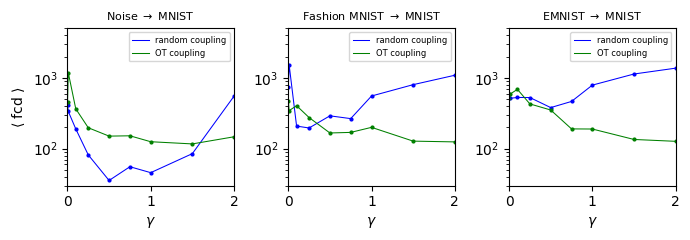

In [11]:
# plot for av fcd 


def avg_fc(metric, bins):
    return [(metric[b][0] + metric[b][1] + metric[b][2])/3 for b in bins]


fig, ax = plt.subplots(1, 3, figsize=(7, 2.5))

ax[0].plot(bins, avg_fc(metric_noise_2_mnist, bins), label=r'random coupling', color='blue', lw=0.75)
ax[0].scatter(bins, avg_fc(metric_noise_2_mnist, bins), color='blue', s=4)
ax[0].plot(bins_OT, avg_fc(metric_noise_2_mnist_OT, bins_OT), label=r'OT coupling', color='green', lw=0.75)
ax[0].scatter(bins_OT, avg_fc(metric_noise_2_mnist_OT, bins_OT), color='green', s=4)
ax[0].set_title(r'Noise $\to$ MNIST', fontsize=8)
ax[0].set_xlabel(r'$\gamma$')
ax[0].set_ylabel(r'$\langle$ fcd $\rangle$')
ax[0].set_ylim([30, 5000])
ax[0].set_xlim([0, 2])
ax[0].set_yscale('log')
ax[0].legend(fontsize=6)

ax[1].plot(bins, avg_fc(metric_fashion_2_mnist, bins), label=r'random coupling', color='blue', lw=0.75)
ax[1].scatter(bins, avg_fc(metric_fashion_2_mnist, bins), color='blue', s=4)
ax[1].plot(bins_OT, avg_fc(metric_fashion_2_mnist_OT, bins_OT), label=r'OT coupling', color='green', lw=0.75)
ax[1].scatter(bins_OT, avg_fc(metric_fashion_2_mnist_OT, bins_OT), color='green', s=4)
ax[1].set_title(r'Fashion MNIST $\to$ MNIST', fontsize=8)
ax[1].set_xlabel(r'$\gamma$')
ax[1].legend(fontsize=6)
ax[1].set_ylim([30, 5000])
ax[1].set_yscale('log')
ax[1].set_xlim([0, 2])

ax[2].plot(bins, avg_fc(metric_emnist_2_mnist, bins), label=r'random coupling', color='blue', lw=0.75)
ax[2].scatter(bins, avg_fc(metric_emnist_2_mnist, bins), color='blue', s=4)
ax[2].plot(bins_OT, avg_fc(metric_emnist_2_mnist_OT, bins_OT), label=r'OT coupling', color='green', lw=0.75)
ax[2].scatter(bins_OT, avg_fc(metric_emnist_2_mnist_OT, bins_OT), color='green', s=4)
ax[2].set_xlabel(r'$\gamma$')
ax[2].set_title(r'EMNIST $\to$ MNIST', fontsize=8)
ax[2].legend(fontsize=6)
ax[2].set_ylim([30, 5000])
ax[2].set_yscale('log')
ax[2].set_xlim([0, 2])

plt.tight_layout()
plt.show()

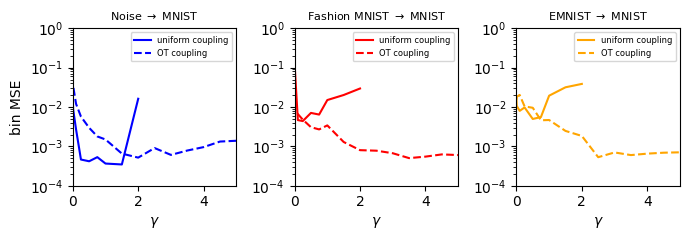

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(7, 2.5))

ax[0].plot(bins, [metric_noise_2_mnist[b][3] for b in bins], label=r'uniform coupling', color='blue')
ax[0].plot(bins_OT, [metric_noise_2_mnist_OT[b][3] for b in bins_OT], label=r'OT coupling', color='blue', ls='--')
ax[0].set_xlabel(r'$\gamma$')
ax[0].set_ylabel(r'bin MSE')
ax[0].set_title(r'Noise $\to$ MNIST', fontsize=8)
ax[0].set_yscale('log')
ax[0].set_xlim([0, 5])
ax[0].set_ylim([1e-4, 1])
ax[0].legend(fontsize=6)

ax[1].plot(bins, [metric_fashion_2_mnist[b][3] for b in bins], label=r'uniform coupling', color='red')
ax[1].plot(bins_OT, [metric_fashion_2_mnist_OT[b][3] for b in bins_OT], label=r'OT coupling', color='red', ls='--')
ax[1].set_xlabel(r'$\gamma$')
ax[1].set_title(r'Fashion MNIST $\to$ MNIST', fontsize=8)
ax[1].legend(fontsize=6)
ax[1].set_yscale('log')
ax[1].set_ylim([1e-4, 1])
ax[1].set_xlim([0, 5])

ax[2].plot(bins, [metric_emnist_2_mnist[b][3] for b in bins], label=r'uniform coupling', color='orange')
ax[2].plot(bins_OT, [metric_emnist_2_mnist_OT[b][3] for b in bins_OT], label=r'OT coupling', color='orange', ls='--')
ax[2].set_xlabel(r'$\gamma$')
ax[2].set_title(r'EMNIST $\to$ MNIST', fontsize=8)
ax[2].legend(fontsize=6)
ax[2].set_yscale('log')
ax[2].set_ylim([1e-4, 1])
ax[2].set_xlim([0, 5])

plt.tight_layout()
plt.show()

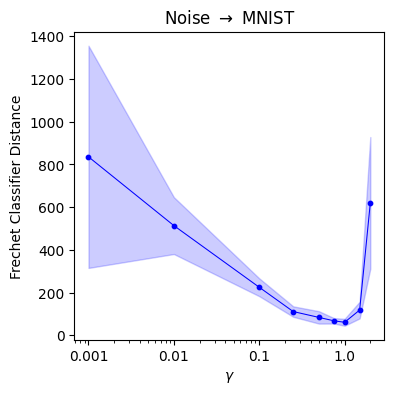

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_values, means, and errors are defined as before

plt.figure(figsize=(4, 4))
plt.scatter(x_values, means, color='blue', s=10)
plt.plot(x_values, means, color='blue', lw=0.75)
plt.fill_between(x_values, np.array(means) - np.array(errors), np.array(means) + np.array(errors), color='blue', alpha=0.2)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'Frechet Classifier Distance')
plt.xscale('log')
plt.title(r'Noise $\to$ MNIST')
plt.xticks([0.001, 0.01, 0.1, 1.0], ['0.001', '0.01', '0.1', '1.0'])
plt.show()

In [10]:
# give me a code that extracts from each sub-directory in a given directory, the data within a specified file:

import os
import numpy as np
from conditional_rate_matching import results_path
import ast
import matplotlib.pyplot as plt



def extract_data(directory, file):
    
    dicts_fashion_uniform = []
    dicts_fashion_OTl2 = []
    dicts_fashion_OTlog = []

    dicts_noise_uniform = []
    dicts_noise_OTl2 = []
    dicts_noise_OTlog = []

    dicts_emnist_uniform = []
    dicts_emnist_OTl2 = []
    dicts_emnist_OTlog = []

    for sub_dir in os.listdir(directory):
        file_path = os.path.join(directory, sub_dir, 'run', file)
        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                dict_str = f.read()
                d = ast.literal_eval(dict_str)
                run = sub_dir.split('_')
                d['source']=run[0]
                d['target']=run[2]
                for i, k in enumerate(run):
                    if 'gamma' in k: d['gamma'] = float(run[i+1])
                    if 'max' in k: d['max'] = float(run[i+1])
                    if 'Thermos' in k: 
                        d['Thermostat'] = k.split('Thermos')[0]

                d['run'] = sub_dir

                if d['source']=='fashion':
                    if 'OTl2' in sub_dir: dicts_fashion_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_fashion_OTlog.append(d)
                    else: dicts_fashion_uniform.append(d)
                if d['source']=='noise':
                    if 'OTl2' in sub_dir: dicts_noise_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_noise_OTlog.append(d)
                    else: dicts_noise_uniform.append(d)
                if d['source']=='emnist':
                    if 'OTl2' in sub_dir: dicts_emnist_OTl2.append(d)
                    elif 'OTlog' in sub_dir: dicts_emnist_OTlog.append(d)
                    else: dicts_emnist_uniform.append(d)
            
        else:
            print('file not found in {}'.format(file_path))
    return ((dicts_noise_uniform, dicts_noise_OTl2, dicts_noise_OTlog), 
            (dicts_fashion_uniform, dicts_fashion_OTl2, dicts_fashion_OTlog),
            (dicts_emnist_uniform, dicts_emnist_OTl2, dicts_emnist_OTlog))

data = extract_data('/home/df630/conditional_rate_matching/results/crm/images', 'metrics.txt')


file not found in /home/df630/conditional_rate_matching/results/crm/images/noise_to_mnist_unet_OTlog_coupling_ConstantThermostat_gamma_0.5__19h58s47_2024.05.07/run/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/crm/images/fashion_to_mnist_unet_OTl2_coupling_ConstantThermostat_gamma_2.0__20h14s20_2024.05.07/run/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/crm/images/emnist_to_mnist_unet_OTlog_coupling_ConstantThermostat_gamma_0.05__14h56s38_2024.05.07/run/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/crm/images/noise_to_mnist_unet_OTl2_coupling_ConstantThermostat_gamma_2.0__20h54s55_2024.05.07/run/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/crm/images/noise_to_mnist_unet_OTl2_coupling_ConstantThermostat_gamma_4.5__18h48s36_2024.05.07/run/metrics.txt
file not found in /home/df630/conditional_rate_matching/results/crm/images/emnist_to_mnist_unet_OTlog_coupling_Constant

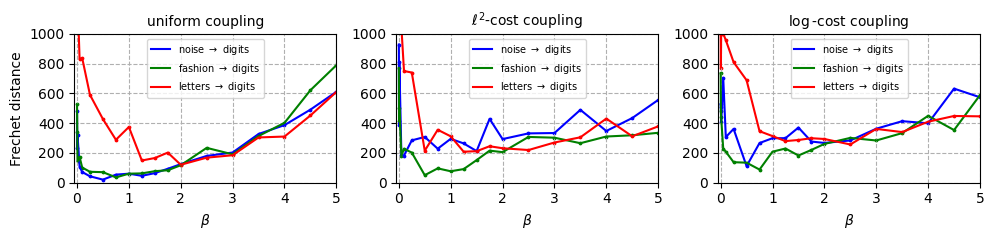

In [11]:


def get_plot(data, ax, label, title=('','',''),  xlim=[0, 2.5], ylim=[0,1000], color='blue'):
    import pandas as pd
    import matplotlib.pyplot as plt
    df1 = pd.DataFrame(data[0])
    df1 = df1.sort_values(by='gamma')
    df2 = pd.DataFrame(data[1])
    df2 = df2.sort_values(by='gamma')
    df3 = pd.DataFrame(data[2])
    df3 = df3.sort_values(by='gamma')
    
    ax[0].plot(df1['gamma'], df1['fid_3'], color=color, label=label)
    ax[0].scatter(df1['gamma'], df1['fid_3'], color=color, s=3)
    ax[0].set_ylabel('Frechet distance')
    ax[0].set_xlabel(r'$\beta$')
    ax[0].set_xlim(xlim)
    ax[0].set_ylim(ylim)
    ax[0].grid(linestyle='--')
    ax[0].legend(fontsize=7,loc='upper center')
    ax[0].set_yticks([0, 200, 400, 600, 800,1000])
    ax[0].set_title(title[0], fontsize=10)

    ax[1].plot(df2['gamma'], df2['fid_3'], color=color, label=label)
    ax[1].scatter(df2['gamma'], df2['fid_3'], color=color, s=3)
    ax[1].set_ylabel('')
    ax[1].set_xlabel(r'$\beta$')
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
    ax[1].grid(linestyle='--')
    ax[1].legend(fontsize=7,loc='upper center')
    ax[1].set_title(title[1], fontsize=10)

    #remove axis
    # ax[1].set_yticks([])

    ax[2].plot(df3['gamma'], df3['fid_3'], color=color, label=label)
    ax[2].scatter(df3['gamma'], df3['fid_3'], color=color, s=3)
    ax[2].set_ylabel('')
    ax[2].set_xlabel(r'$\beta$')
    ax[2].set_xlim(xlim)
    ax[2].set_ylim(ylim)
    ax[2].legend(fontsize=7,loc='upper center')
    ax[2].grid(linestyle='--')
    ax[2].set_title(title[2], fontsize=10)

fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(data[0], ax, label=r'noise $\to$ digits', xlim=[-0.05,5], color='blue')
get_plot(data[1], ax, label=r'fashion $\to$ digits', xlim=[-0.05,5], color='green')
get_plot(data[2], ax, label=r'letters $\to$ digits', title= ('uniform coupling', '$\ell^2$-cost coupling', '$\log$-cost coupling'), xlim=[-0.05,5], color='red')
plt.tight_layout()
plt.show()

In [6]:
# tranpose of tuple

def transpose(t): 
    return tuple(zip(*t))



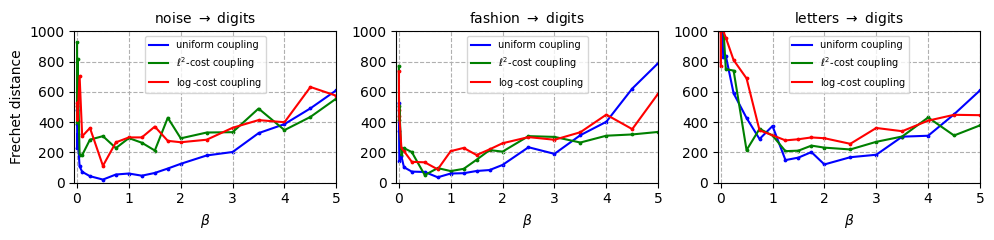

In [13]:
data_T = transpose(data)
fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))
get_plot(data_T[0], ax, label=r'uniform coupling', xlim=[-0.05,5], color='blue')
get_plot(data_T[1], ax, label=r'$\ell^2$-cost coupling', xlim=[-0.05,5], color='green')
get_plot(data_T[2], ax,  label=r'$\log$-cost coupling',  title= (r'noise $\to$ digits', r'fashion $\to$ digits', r'letters $\to$ digits'), xlim=[-0.05,5], color='red')
plt.tight_layout()
plt.show()